In [40]:
%matplotlib inline

In [381]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_fscore_support, classification_report

# Model Training Regretion

### Read data, naming of columns

In [42]:
mpg_data = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None, na_vals=['?'])

In [43]:
mpg_data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

### Observing and cleaning

In [44]:
mpg_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [45]:
mpg_data.shape

(398, 9)

In [46]:
mpg_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [47]:
mpg_data = mpg_data.drop(mpg_data[mpg_data.horsepower == '?'].index)

In [48]:
mpg_data.horsepower = mpg_data.horsepower.astype(np.float64)

In [49]:
mpg_data = mpg_data.drop('car_name', axis=1)

### Defining attributes and target, scaling of attributes

In [50]:
mpg_data_atributes = mpg_data.drop('mpg', axis=1)
mpg_data_target = mpg_data['mpg']

In [51]:
mpg_data_atributes.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [52]:
# по принцим скалера се запазва в променива. тук не го правим
mpg_data_atributes_scaled = MinMaxScaler().fit_transform(mpg_data_atributes)

In [53]:
mpg_data_atributes_scaled.min(axis=0), mpg_data_atributes_scaled.max(axis=0)

(array([0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1.]))

### Create a model

In [54]:
linear_regression = LinearRegression()
linear_regression.fit(mpg_data_atributes_scaled, mpg_data_target)

LinearRegression()

In [55]:
linear_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.8214780764810597

In [161]:
linear_regression.coef_

array([ -1.79818983,   6.1120602 ,  -5.16485976, -21.18236454,
         0.692132  ,   8.90503197,   3.3475977 ])

### Ridge regression L2

In [179]:
l2_regression = Ridge()
l2_regression.fit(mpg_data_atributes_scaled, mpg_data_target)

Ridge()

In [180]:
l2_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.8164896635931875

In [181]:
l2_regression.coef_

array([ -2.07254505,   1.34709697,  -4.22762374, -15.91870549,
        -0.3104336 ,   8.5058759 ,   2.7489514 ])

In [373]:
l2_regression = Ridge(alpha=0.05)
l2_regression.fit(mpg_data_atributes_scaled, mpg_data_target)
l2_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.8214407166016684

In [374]:
l2_regression.coef_, l2_regression.intercept_

(array([ -2.37929977,   7.09048065,  -3.24014833, -22.2462324 ,
          1.17508938,   8.97144398,   2.83860732]),
 26.126525266907958)

### Lasso regression L1 with different levels of regularisation

In [269]:
l1_regression = Lasso(alpha=10)
l1_regression.fit(mpg_data_atributes_scaled, mpg_data_target)
l1_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.0

In [270]:
list(l1_regression.coef_), l1_regression.intercept_

([-0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0], 23.445918367346938)

In [271]:
l1_regression = Lasso(alpha=2)
l1_regression.fit(mpg_data_atributes_scaled, mpg_data_target)
l1_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.03763516750331519

In [272]:
list(l1_regression.coef_), l1_regression.intercept_

([-0.5625203206457757, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0], 23.72402152587028)

In [273]:
l1_regression = Lasso(alpha=1)
l1_regression.fit(mpg_data_atributes_scaled, mpg_data_target)
l1_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.4854235870676168

In [274]:
list(l1_regression.coef_), l1_regression.intercept_

([-8.606404264927175,
  -0.0,
  -0.0,
  -0.0,
  0.0,
  0.6894862782327024,
  0.5297330403159326],
 27.204545050949996)

In [277]:
l1_regression = Lasso(alpha=0.5)
l1_regression.fit(mpg_data_atributes_scaled, mpg_data_target)
l1_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.708650548639528

In [278]:
list(l1_regression.coef_), l1_regression.intercept_

([-7.607379087905398,
  -0.0,
  -0.0,
  -4.998097007537455,
  0.0,
  4.884512056163431,
  1.7726287278983843],
 26.19572360136909)

In [310]:
l1_regression = Lasso(alpha=0.1)
l1_regression.fit(mpg_data_atributes_scaled, mpg_data_target)
l1_regression.score(mpg_data_atributes_scaled, mpg_data_target)

0.8131117430959438

In [311]:
list(l1_regression.coef_), l1_regression.intercept_

([-1.6212205303996081,
  -0.0,
  -0.0,
  -17.79436893033446,
  0.0,
  8.236972644880698,
  2.1896020643610306],
 26.396345980998465)

In [152]:
mpg_data_atributes.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

### ElasticNet

In [380]:
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(mpg_data_atributes_scaled, mpg_data_target)
elastic_net.score(mpg_data_atributes_scaled, mpg_data_target)

0.8111627435600413

### GridSearchCV

In [344]:
params = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'max_iter': [1000, 10000, 20000]
}
grid_search = GridSearchCV(estimator=Lasso(), param_grid=params)

In [345]:
grid_search.fit(mpg_data_atributes_scaled, mpg_data_target)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000],
                         'fit_intercept': [True, False],
                         'max_iter': [1000, 10000, 20000]})

In [327]:
grid_search.best_estimator_.score(mpg_data_atributes_scaled, mpg_data_target)

0.819294163777842

In [349]:
grid_search.best_score_

0.5866592731287736

In [333]:
grid_search.best_estimator_.get_params()

{'alpha': 0.01,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [339]:
cv_results = pd.DataFrame(grid_search.cv_results_)

In [341]:
cv_results.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.00138855,0.000396347,0.000609064,0.000399494,0.000582266,0.000198698,0.000603056,0.000801897,0,0,...,0,0.00201263,0,1.92165e-05,0,4.1008e-05,0,0.00132213,0.000393343,0.00161219
std_fit_time,0.000381902,0.000485463,0.00050106,0.000489438,0.00047608,0.000397396,0.000492404,0.000402406,0,0,...,0,0.00402527,0,3.84331e-05,0,5.03241e-05,0,0.00264425,0.000786686,0.00322437
mean_score_time,0.000599813,0.000399923,0.000391722,0.000417233,0.000619507,0.000200224,0.000399828,0,0.000181675,0.00101418,...,0,0,0,0,0.000522137,0,0,0,0,0
std_score_time,0.000799335,0.000489804,0.000479891,0.000511919,0.000506598,0.000400448,0.000489688,0,0.00036335,2.84282e-05,...,0,0,0,0,0.00104427,0,0,0,0,0
param_alpha,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,...,100,100,100,100,1000,1000,1000,1000,1000,1000
param_fit_intercept,True,True,True,False,False,False,True,True,True,False,...,True,False,False,False,True,True,True,False,False,False
param_max_iter,1000,10000,20000,1000,10000,20000,1000,10000,20000,1000,...,20000,1000,10000,20000,1000,10000,20000,1000,10000,20000
params,"{'alpha': 0.01, 'fit_intercept': True, 'max_it...","{'alpha': 0.01, 'fit_intercept': True, 'max_it...","{'alpha': 0.01, 'fit_intercept': True, 'max_it...","{'alpha': 0.01, 'fit_intercept': False, 'max_i...","{'alpha': 0.01, 'fit_intercept': False, 'max_i...","{'alpha': 0.01, 'fit_intercept': False, 'max_i...","{'alpha': 0.1, 'fit_intercept': True, 'max_ite...","{'alpha': 0.1, 'fit_intercept': True, 'max_ite...","{'alpha': 0.1, 'fit_intercept': True, 'max_ite...","{'alpha': 0.1, 'fit_intercept': False, 'max_it...",...,"{'alpha': 100, 'fit_intercept': True, 'max_ite...","{'alpha': 100, 'fit_intercept': False, 'max_it...","{'alpha': 100, 'fit_intercept': False, 'max_it...","{'alpha': 100, 'fit_intercept': False, 'max_it...","{'alpha': 1000, 'fit_intercept': True, 'max_it...","{'alpha': 1000, 'fit_intercept': True, 'max_it...","{'alpha': 1000, 'fit_intercept': True, 'max_it...","{'alpha': 1000, 'fit_intercept': False, 'max_i...","{'alpha': 1000, 'fit_intercept': False, 'max_i...","{'alpha': 1000, 'fit_intercept': False, 'max_i..."
split0_test_score,0.543046,0.543046,0.543046,-0.540756,-0.540756,-0.540756,0.714541,0.714541,0.714541,-1.60084,...,-1.03589,-10.371,-10.371,-10.371,-1.03589,-1.03589,-1.03589,-10.371,-10.371,-10.371
split1_test_score,0.706618,0.706618,0.706618,0.513273,0.513273,0.513273,0.74219,0.74219,0.74219,0.539185,...,-0.73373,-10.7066,-10.7066,-10.7066,-0.73373,-0.73373,-0.73373,-10.7066,-10.7066,-10.7066


### KFold

In [358]:
k_fold = KFold(n_splits=5)

In [361]:
scores = cross_val_score(l1_regression, mpg_data_atributes_scaled, mpg_data_target, cv=k_fold)

In [362]:
scores

array([0.71454093, 0.74219036, 0.8161181 , 0.65711864, 0.00194351])

### Split scaled attributes and targets - train_test_split()

In [94]:
mpg_data_atributes_scaled_train, mpg_data_atributes_scaled_test, mpg_data_target_train, mpg_data_target_test = train_test_split(
    mpg_data_atributes_scaled, mpg_data_target, train_size = 0.7, random_state=42)

In [95]:
mpg_data_atributes_scaled_train.shape, mpg_data_atributes_scaled_test.shape

((274, 7), (118, 7))

In [96]:
mpg_data_target_train.shape, mpg_data_target_test.shape

((274,), (118,))

### Compearing results of the model with splited data without regularisation

In [97]:
linear_regression = LinearRegression()
linear_regression.fit(mpg_data_atributes_scaled_train, mpg_data_target_train)

LinearRegression()

In [98]:
linear_regression.score(mpg_data_atributes_scaled_train, mpg_data_target_train)

0.8221075220232333

In [99]:
linear_regression.score(mpg_data_atributes_scaled_test, mpg_data_target_test)

0.8097361276184127

In [100]:
predicted_mpgs = linear_regression.predict(mpg_data_atributes_scaled_test)

## Evaluation model performance

### Histograms of Test target and Predicted values using test atributes

In [382]:
r2_score(mpg_data_target_test, predicted_mpgs)

0.8097361276184127

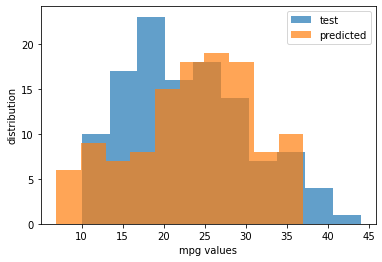

In [375]:
plt.hist(mpg_data_target_test, label='test', alpha=0.7)
plt.hist(predicted_mpgs, label='predicted', alpha=0.7)

plt.xlabel('mpg values')
plt.ylabel('distribution')

plt.legend()
plt.show()

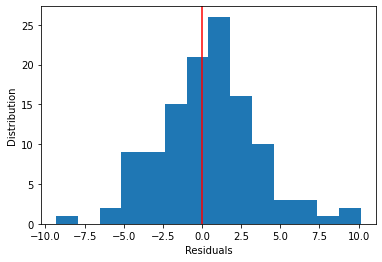

In [379]:
# Histogram of Observed(predicted) - Estimated(actual)

plt.hist(predicted_mpgs - mpg_data_target_test, bins='fd')
plt.axvline([0], color='red')

plt.xlabel('Residuals')
plt.ylabel('Distribution')

plt.show()
# При добър модел повечето разлики трябва да са близки до нулата

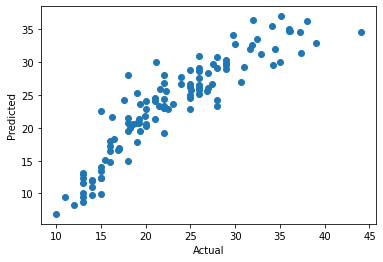

In [391]:
# Scaterplot
plt.scatter(mpg_data_target_test, predicted_mpgs)

plt.xlabel('Actual')
plt.ylabel('Predicted')

plt.show()

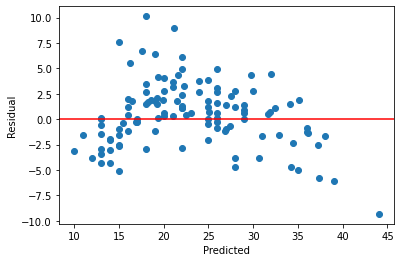

In [378]:
# Residual scaterplot

plt.scatter(mpg_data_target_test, predicted_mpgs - mpg_data_target_test)

plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline([0], c='red')

plt.show()
# за да кажем, че моделът е добър, точките трябва да са разпилени равномерно и да са в малък интервал по у